In [1]:
import glob
import math
import os
import subprocess
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

sns.set()

In [2]:
SCENARIO_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
RESULTS_DIR = f'{SCENARIO_DIR}/results'
SCENARIO = "Default"
DB_PATH = f'{RESULTS_DIR}/{SCENARIO}.db'
PLOT_HEIGHT = 4
PLOT_ASPECT = 2

In [3]:
import sqlite3

sql = '''select * from results;'''
#sql = '''select * from results limit 100000;'''
conn = sqlite3.connect(DB_PATH)
df = pd.read_sql(sql, conn)

In [9]:
df.sample(10)

,node_id,run_id,seconds,frame_error_rate,controller,mpr,mobility_posx,mobility_posy,mobility_acceleration,mobility_co2emission,...,appl_speed,appl_acceleration,appl_leaderDistance,appl_relativeSpeed,appl_controllerAcceleration,appl_distanceTravelled,appl_laneIdx,prot_nodeId,prot_busyTime,prot_collisions
5207936,908,3,22186.399,0.5,"""CACC""",0.5,NaN,NaN,NaN,NaN,...,30.836123,0.000000,4.947485e-314,9.387247e-323,0.0,4066.853220,0,NaN,NaN,NaN
1677239,78,1,21772.600,0.0,"""CACC""",0.5,5364.669262,5008.281784,0.000000,4.323781,...,27.367566,0.000000,1.963420e-314,9.387247e-323,0.0,3581.944197,1,NaN,NaN,NaN
1154966,3502,0,23039.700,0.0,"""CACC""",0.5,14385.892916,688.747411,0.296462,6.327153,...,27.484188,-0.760959,1.572439e-316,9.387247e-323,0.0,960.923422,1,NaN,NaN,NaN
4483579,2229,2,23068.600,0.5,"""CACC""",0.5,2653.834563,6784.441599,0.791148,9.893891,...,28.066526,0.824112,4.990668e-315,9.387247e-323,0.0,14316.499752,1,NaN,NaN,NaN
4229986,2768,2,22863.100,0.5,"""CACC""",0.5,3964.445954,5981.172790,-1.844322,0.973000,...,26.445963,1.897206,2.060491e-314,9.387247e-323,0.0,1909.576427,1,NaN,NaN,NaN
468899,1676,0,22404.700,0.0,"""CACC""",0.5,12970.340243,1170.451389,0.168872,5.445269,...,27.376566,0.175908,1.584831e-316,9.387247e-323,0.0,812.018871,2,NaN,NaN,NaN
3626726,1278,2,22262.200,0.5,"""CACC""",0.5,1126.382220,6050.629505,-0.082461,4.623561,...,30.603499,-0.081538,3.013910e-314,9.387247e-323,0.0,1314.480178,0,NaN,NaN,NaN
2293654,1963,1,22586.600,0.0,"""CACC""",0.5,12042.219528,1577.803128,0.623809,9.843249,...,30.559143,-0.934452,9.107717e-314,9.387247e-323,0.0,3332.848793,1,NaN,NaN,NaN
1767512,697,1,21980.399,0.0,"""CACC""",0.5,NaN,NaN,NaN,NaN,...,17.426409,0.000000,2.091516e-314,9.387247e-323,0.0,261.998876,0,NaN,NaN,NaN
2015075,959,1,22301.600,0.0,"""CACC""",0.5,9186.770361,3367.412627,0.000000,4.554317,...,28.245658,0.000000,5.719209e-315,9.387247e-323,0.0,6462.982088,1,NaN,NaN,NaN


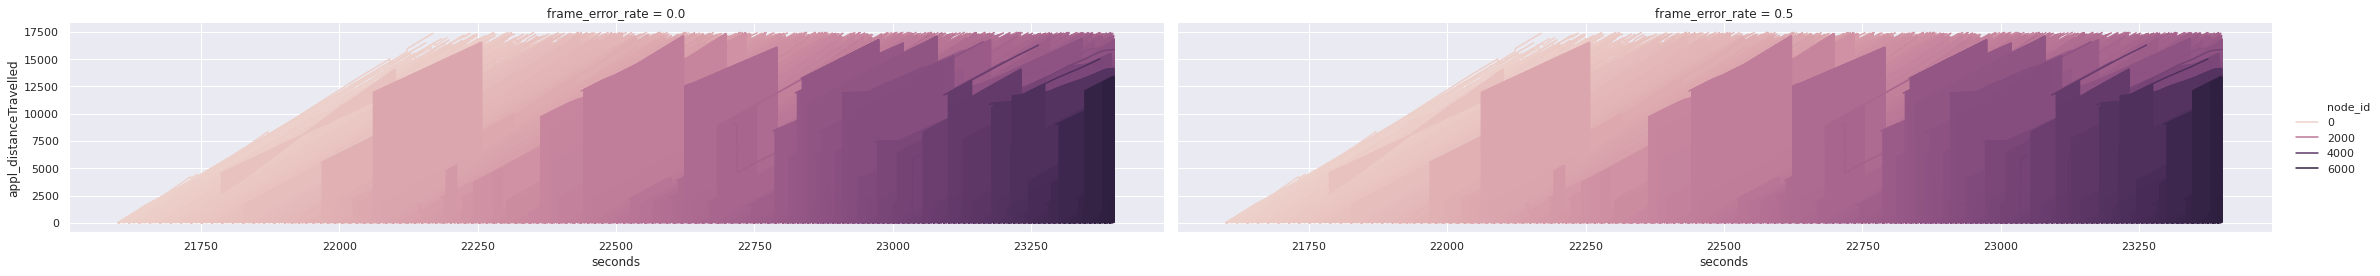

In [5]:
sns.relplot(x='seconds', y='appl_distanceTravelled', hue='node_id', kind='line', col="frame_error_rate", data=df, ci=None, height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2)

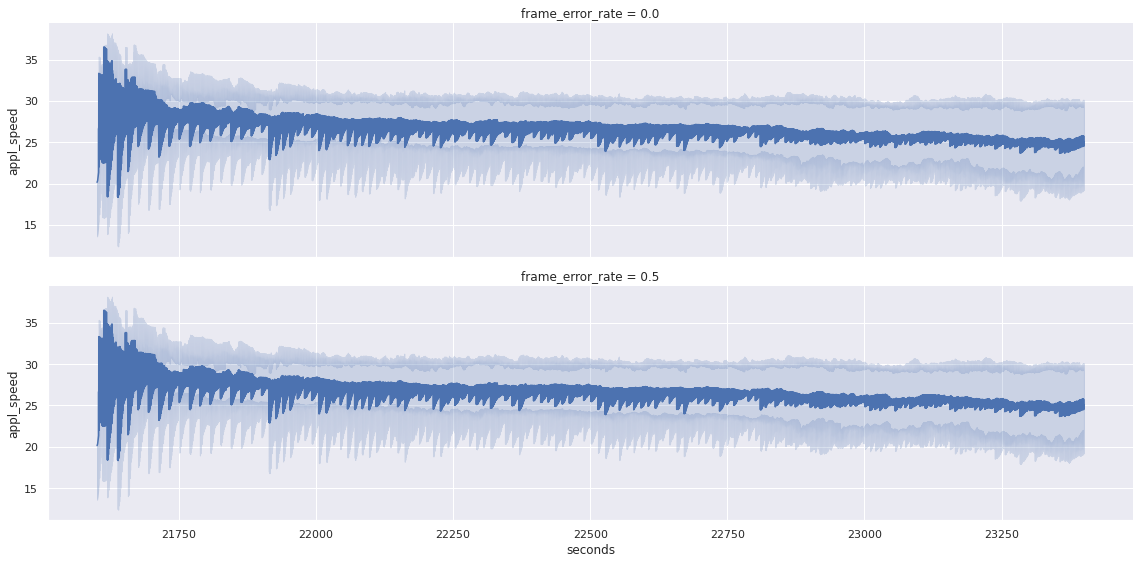

In [6]:
sns.relplot(x='seconds', y='appl_speed', kind='line', row="frame_error_rate", data=df, height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2, ci='sd')

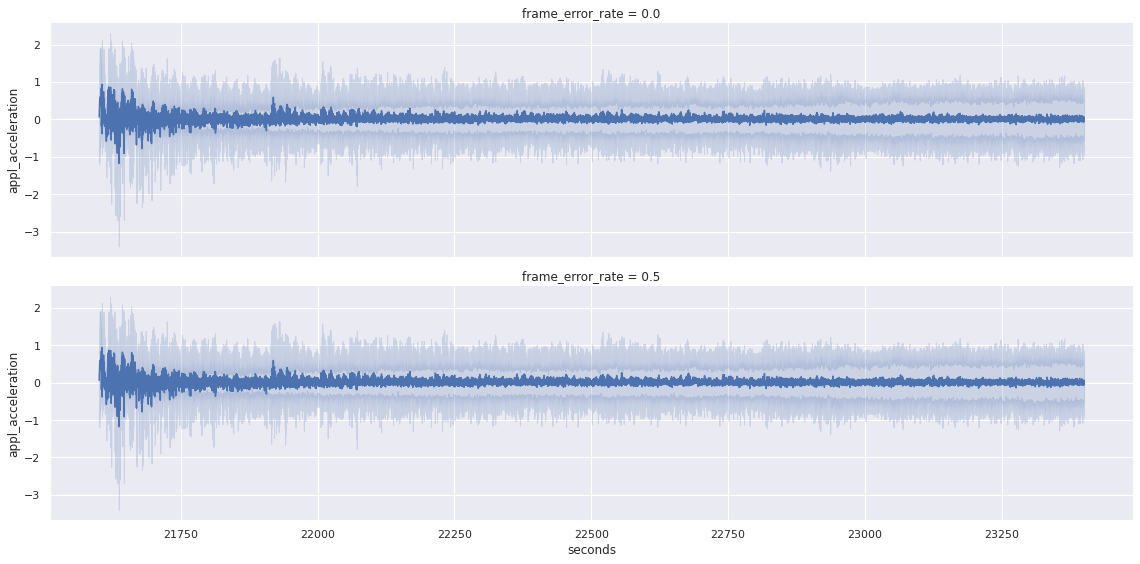

In [7]:
sns.relplot(x='seconds', y='appl_acceleration', kind='line', row="frame_error_rate", data=df, height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2, ci='sd')

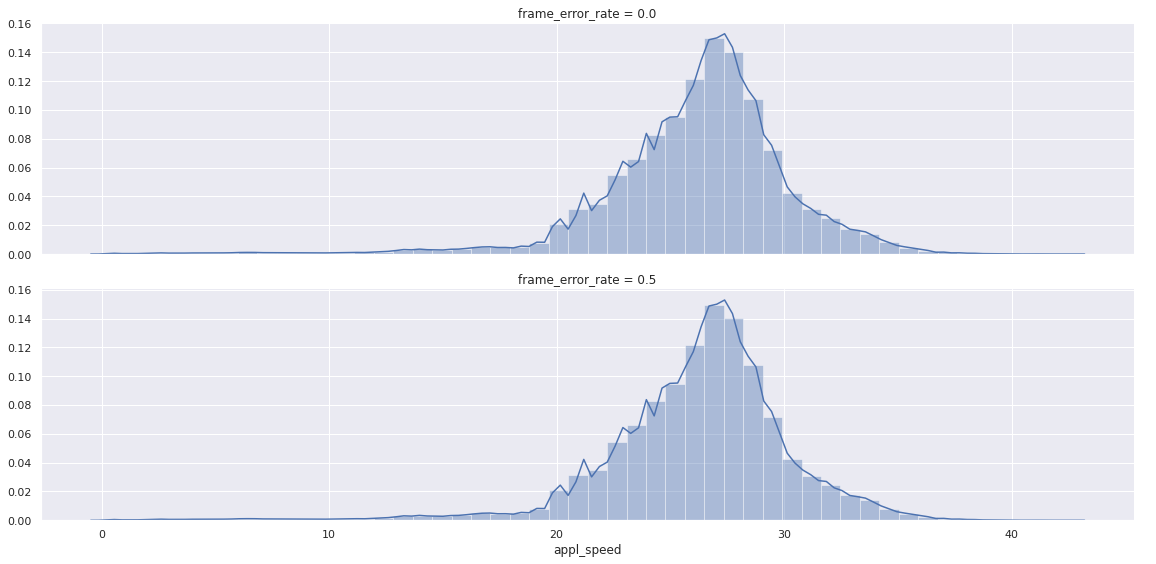

In [8]:
g = sns.FacetGrid(df, row="frame_error_rate", height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2)
g.map(sns.distplot, "appl_speed")
g.add_legend()